In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('cirrhosis.csv')

In [3]:
data.head(3)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0


In [4]:
data.sample(3)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
140,3050,C,D-penicillamine,17180,F,N,N,N,N,0.9,346.0,3.77,59.0,794.0,125.55,56.0,336.0,10.6,2.0
318,41,D,NaN,16802,F,NaN,NaN,NaN,N,5.0,NaN,2.93,NaN,NaN,NaN,NaN,260.0,10.4,NaN
210,2195,C,Placebo,19327,F,N,N,N,N,1.3,NaN,3.76,27.0,1282.0,100.75,NaN,114.0,10.3,3.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [6]:
data.shape

(418, 19)

In [7]:
data.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [8]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [9]:
data.corr()

C:\Users\chahil choudhary\AppData\Local\Temp\ipykernel_24508\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.125934,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Age,-0.125934,1.000000,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Bilirubin,-0.403953,0.002362,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731
Cholesterol,-0.138236,-0.157620,0.397129,1.000000,-0.069733,0.126115,0.149473,0.353246,0.276830,0.191710,-0.030811,0.011164
Albumin,0.430829,-0.182350,-0.314177,-0.069733,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.158659,-0.200592,-0.305296
Copper,-0.364809,0.061549,0.456918,0.126115,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224,0.269400
Alk_Phos,0.149269,-0.047247,0.116984,0.149473,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384,0.041273
SGOT,-0.225492,-0.149869,0.441730,0.353246,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174,0.164945
Tryglicerides,-0.153000,0.022065,0.436748,0.276830,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122,0.123899
Platelets,0.151361,-0.148201,-0.013435,0.191710,0.158659,-0.064403,0.143733,-0.120147,0.103212,1.000000,-0.167331,-0.253523


<Axes: xlabel='Stage', ylabel='count'>

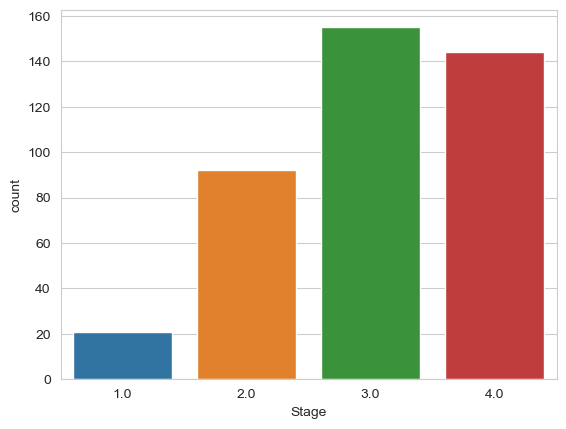

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Stage',data=data)

<Axes: xlabel='Stage', ylabel='count'>

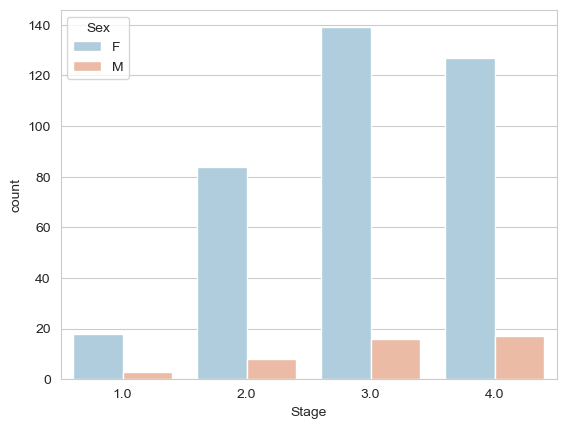

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Stage',hue='Sex',data=data,palette='RdBu_r')

<Axes: xlabel='Age'>

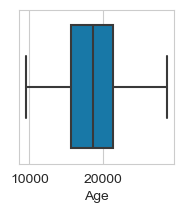

In [12]:
plt.figure(figsize=(2, 2))
sns.boxplot(x='Age',data=data,palette='winter')

<Axes: >

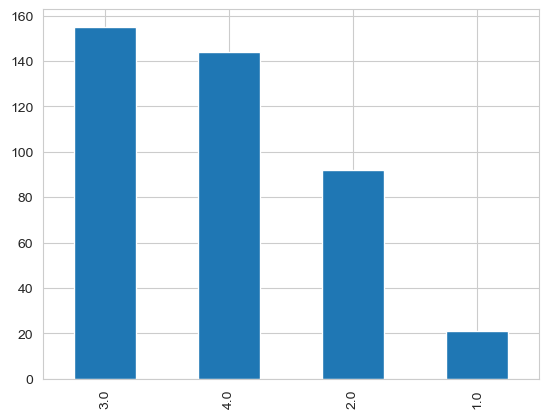

In [13]:
data['Stage'].value_counts().plot(kind='bar')

In [14]:
data['Drug'].isnull().mean()*100

25.358851674641148

In [15]:
data['Drug'].isnull().mean()*100

25.358851674641148

In [16]:
data['Ascites'].isnull().mean()*100

25.358851674641148

In [17]:
data['Hepatomegaly'].isnull().mean()*100

25.358851674641148

In [18]:
data['Spiders'].isnull().mean()*100

25.358851674641148

In [19]:
data['Cholesterol'].isnull().mean()*100

32.057416267942585

In [20]:
data['Copper'].isnull().mean()*100

25.837320574162682

In [21]:
data['Alk_Phos'].isnull().mean()*100

25.358851674641148

In [22]:
data['SGOT'].isnull().mean()*100

25.358851674641148

In [23]:
data['Tryglicerides'].isnull().mean()*100

32.535885167464116

In [24]:
data['Platelets'].isnull().mean()*100

2.631578947368421

In [25]:
data['Stage'].isnull().mean()*100

1.4354066985645932

In [26]:
data['Prothrombin'].isnull().mean()*100

0.4784688995215311

In [27]:
data.head(3)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0


In [28]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')
data['Drug'] = imputer.fit_transform(data[['Drug']])

In [29]:
imputer = SimpleImputer(strategy='most_frequent')
data['Ascites'] = imputer.fit_transform(data[['Ascites']])

In [30]:
imputer = SimpleImputer(strategy='most_frequent')
data['Hepatomegaly'] = imputer.fit_transform(data[['Hepatomegaly']])

In [31]:
imputer = SimpleImputer(strategy='most_frequent')
data['Spiders'] = imputer.fit_transform(data[['Spiders']])

In [32]:
imputer = SimpleImputer(strategy='mean')
data['Cholesterol'] = imputer.fit_transform(data[['Cholesterol']])

In [33]:
imputer = SimpleImputer(strategy='mean')
data['Copper'] = imputer.fit_transform(data[['Copper']])

In [34]:
imputer = SimpleImputer(strategy='mean')
data['Alk_Phos'] = imputer.fit_transform(data[['Alk_Phos']])

In [35]:
imputer = SimpleImputer(strategy='mean')
data['SGOT'] = imputer.fit_transform(data[['SGOT']])

In [36]:
imputer = SimpleImputer(strategy='mean')
data['Tryglicerides'] = imputer.fit_transform(data[['Tryglicerides']])

In [37]:
imputer = SimpleImputer(strategy='mean')
data['Platelets'] = imputer.fit_transform(data[['Platelets']])

In [38]:
imputer = SimpleImputer(strategy='mean')
data['Prothrombin'] = imputer.fit_transform(data[['Prothrombin']])

In [39]:
data.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            6
dtype: int64

In [40]:
data.dropna(subset=['Stage'],inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         412 non-null    int64  
 1   Status         412 non-null    object 
 2   Drug           412 non-null    object 
 3   Age            412 non-null    int64  
 4   Sex            412 non-null    object 
 5   Ascites        412 non-null    object 
 6   Hepatomegaly   412 non-null    object 
 7   Spiders        412 non-null    object 
 8   Edema          412 non-null    object 
 9   Bilirubin      412 non-null    float64
 10  Cholesterol    412 non-null    float64
 11  Albumin        412 non-null    float64
 12  Copper         412 non-null    float64
 13  Alk_Phos       412 non-null    float64
 14  SGOT           412 non-null    float64
 15  Tryglicerides  412 non-null    float64
 16  Platelets      412 non-null    float64
 17  Prothrombin    412 non-null    float64
 18  Stage     

In [42]:
data.shape

(412, 19)

In [43]:
data.sample(2)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
229,1979,C,Placebo,12641,F,N,Y,Y,N,3.3,302.0,3.41,51.0,310.0,83.7,44.0,95.0,11.5,4.0
166,1682,D,D-penicillamine,22265,M,N,Y,N,N,0.9,376.0,3.86,200.0,1015.0,83.7,154.0,238.0,10.3,4.0


In [44]:
le = LabelEncoder()

In [45]:
data['Status'] = le.fit_transform(data['Status'])

In [46]:
data['Drug'] = le.fit_transform(data['Drug'])

In [47]:
data['Sex'] = le.fit_transform(data['Sex'])

In [48]:
data['Ascites'] = le.fit_transform(data['Ascites'])

In [49]:
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])

In [50]:
data['Spiders'] = le.fit_transform(data['Hepatomegaly'])

In [51]:
data['Edema'] = le.fit_transform(data['Hepatomegaly'])

In [52]:
data['Bilirubin'] = le.fit_transform(data['Hepatomegaly'])

In [53]:
data.head(20)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,21464,0,1,1,1,1,1,261.000000,2.60,156.0,1718.0,137.95,172.000000,190.00000,12.2,4.0
1,4500,0,0,20617,0,0,1,1,1,1,302.000000,4.14,54.0,7394.8,113.52,88.000000,221.00000,10.6,3.0
2,1012,2,0,25594,1,0,0,0,0,0,176.000000,3.48,210.0,516.0,96.10,55.000000,151.00000,12.0,4.0
3,1925,2,0,19994,0,0,1,1,1,1,244.000000,2.54,64.0,6121.8,60.63,92.000000,183.00000,10.3,4.0
4,1504,1,2,13918,0,0,1,1,1,1,279.000000,3.53,143.0,671.0,113.15,72.000000,136.00000,10.9,3.0
5,2503,2,2,24201,0,0,1,1,1,1,248.000000,3.98,50.0,944.0,93.00,63.000000,257.02457,11.0,3.0
6,1832,0,2,20284,0,0,1,1,1,1,322.000000,4.09,52.0,824.0,60.45,213.000000,204.00000,9.7,3.0
7,2466,2,2,19379,0,0,0,0,0,0,280.000000,4.00,52.0,4651.2,28.38,189.000000,373.00000,11.0,3.0
8,2400,2,0,15526,0,0,0,0,0,0,562.000000,3.08,79.0,2276.0,144.15,88.000000,251.00000,11.0,2.0
9,51,2,2,25772,0,1,0,0,0,0,200.000000,2.74,140.0,918.0,147.25,143.000000,302.00000,11.5,4.0


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

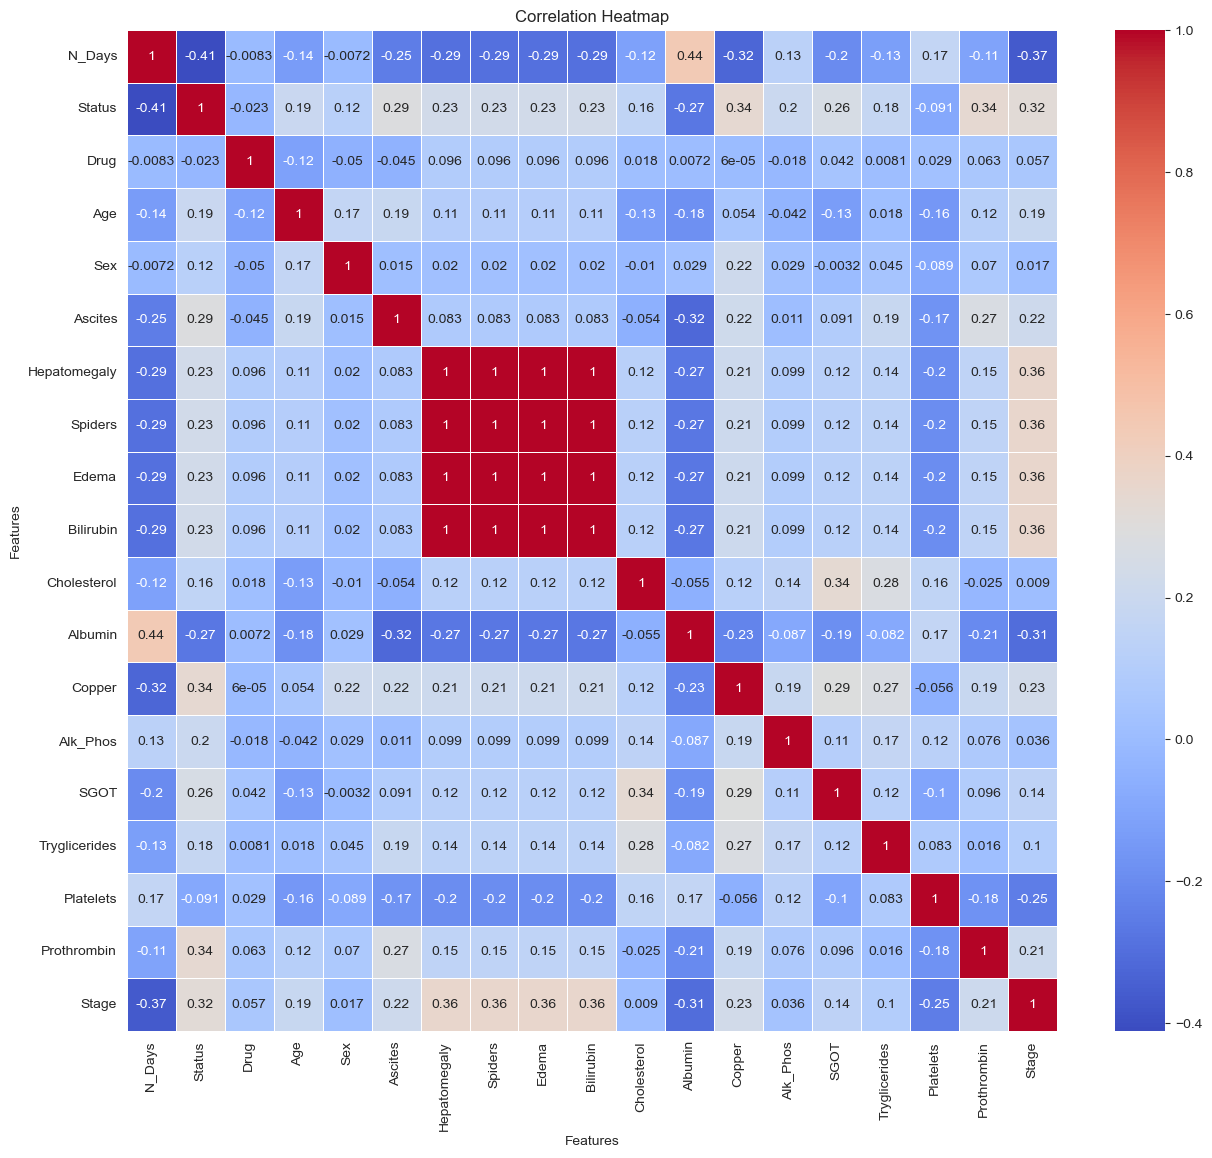

In [58]:
# Create a heatmap
plt.figure(figsize=(15, 13))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming glumas_df is your loaded data and it's already in a pandas DataFrame format
# Assuming the last column of glumas_df is the target variable, modify if it's different
X = data.drop('Stage', axis=1)  # Features without 'outcome' column
y = data['Stage']  # Only the 'outcome' column

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_
features = X.columns

# Create a DataFrame for feature importance and sort by the importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 13 features
top_features = importance_df['Feature'].head(10).tolist()

# Create a new DataFrame with the top 13 features and target value
data = data[top_features + [y.name]]

print(data.head())


   N_Days  Prothrombin  Albumin  Platelets    Age  Cholesterol  Copper  \
0     400         12.2     2.60      190.0  21464        261.0   156.0   
1    4500         10.6     4.14      221.0  20617        302.0    54.0   
2    1012         12.0     3.48      151.0  25594        176.0   210.0   
3    1925         10.3     2.54      183.0  19994        244.0    64.0   
4    1504         10.9     3.53      136.0  13918        279.0   143.0   

   Alk_Phos  Tryglicerides    SGOT  Stage  
0    1718.0          172.0  137.95    4.0  
1    7394.8           88.0  113.52    3.0  
2     516.0           55.0   96.10    4.0  
3    6121.8           92.0   60.63    4.0  
4     671.0           72.0  113.15    3.0  


In [60]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = data.drop('Stage', axis=1)
y = data['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((329, 10), (83, 10), (329,), (83,))

In [65]:
data.head(3)

,N_Days,Prothrombin,Albumin,Platelets,Age,Cholesterol,Copper,Alk_Phos,Tryglicerides,SGOT,Stage
0,400,12.2,2.60,190.0,21464,261.0,156.0,1718.0,172.0,137.95,4.0
1,4500,10.6,4.14,221.0,20617,302.0,54.0,7394.8,88.0,113.52,3.0
2,1012,12.0,3.48,151.0,25594,176.0,210.0,516.0,55.0,96.10,4.0


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dictionary to store results
model_results = {}

# Models to train and evaluate
models = {
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),  # Increased max_iter
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        # Handle undefined metrics by setting zero_division=1
        report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
        confusion = confusion_matrix(y_test, y_pred)

        model_results[name] = {
            'Accuracy': accuracy,
            'Classification Report': report,
            'Confusion Matrix': confusion
        }
    except Exception as e:
        print(f"Error occurred with model {name}: {e}")

model_results


C:\Users\chahil choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'GradientBoosting': {'Accuracy': 0.5180722891566265,
  'Classification Report': {'1.0': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 6},
   '2.0': {'precision': 0.3888888888888889,
    'recall': 0.3888888888888889,
    'f1-score': 0.3888888888888889,
    'support': 18},
   '3.0': {'precision': 0.4722222222222222,
    'recall': 0.6071428571428571,
    'f1-score': 0.53125,
    'support': 28},
   '4.0': {'precision': 0.6785714285714286,
    'recall': 0.6129032258064516,
    'f1-score': 0.6440677966101694,
    'support': 31},
   'accuracy': 0.5180722891566265,
   'macro avg': {'precision': 0.38492063492063494,
    'recall': 0.4022337429595494,
    'f1-score': 0.3910516713747646,
    'support': 83},
   'weighted avg': {'precision': 0.4970835723847772,
    'recall': 0.5180722891566265,
    'f1-score': 0.5041096589748826,
    'support': 83}},
  'Confusion Matrix': array([[ 0,  3,  3,  0],
         [ 0,  7,  8,  3],
         [ 0,  5, 17,  6],
         [ 1,  3,  8,

Epoch 1/10
254/254 [==============================] - 2s 4ms/step - loss: -2067454.2500 - accuracy: 0.2441 - val_loss: -18284642.0000 - val_accuracy: 0.0723
Epoch 2/10
254/254 [==============================] - 1s 2ms/step - loss: -146421696.0000 - accuracy: 0.2500 - val_loss: -579598144.0000 - val_accuracy: 0.0723
Epoch 3/10
254/254 [==============================] - 1s 2ms/step - loss: -1305875200.0000 - accuracy: 0.2500 - val_loss: -3577283072.0000 - val_accuracy: 0.0723
Epoch 4/10
254/254 [==============================] - 1s 2ms/step - loss: -5239941120.0000 - accuracy: 0.2500 - val_loss: -11714655232.0000 - val_accuracy: 0.0723
Epoch 5/10
254/254 [==============================] - 1s 2ms/step - loss: -14385668096.0000 - accuracy: 0.2500 - val_loss: -28234672128.0000 - val_accuracy: 0.0723
Epoch 6/10
254/254 [==============================] - 1s 2ms/step - loss: -30279278592.0000 - accuracy: 0.2500 - val_loss: -56191520768.0000 - val_accuracy: 0.0723
Epoch 7/10
254/254 [==========

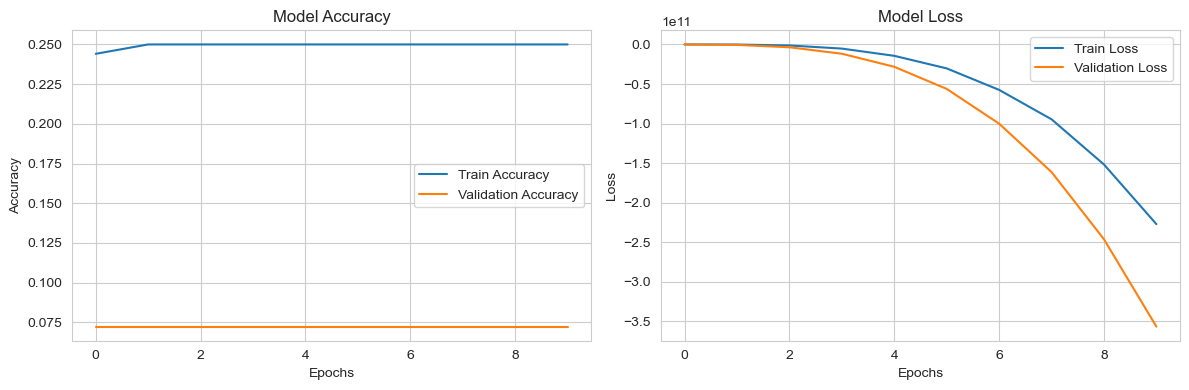

3/3 [==============================] - 0s 2ms/step


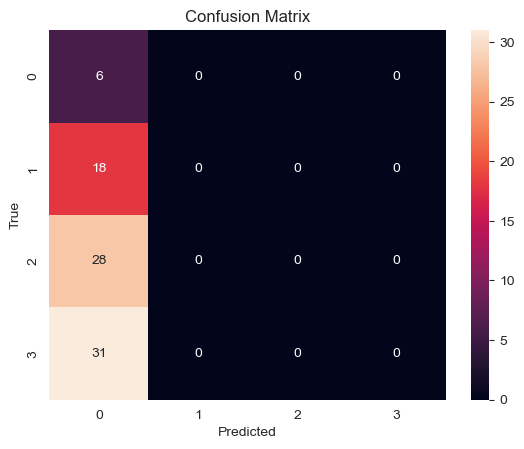

              precision    recall  f1-score   support

         1.0       0.07      1.00      0.13         6
         2.0       0.00      0.00      0.00        18
         3.0       0.00      0.00      0.00        28
         4.0       0.00      0.00      0.00        31

    accuracy                           0.07        83
   macro avg       0.02      0.25      0.03        83
weighted avg       0.01      0.07      0.01        83



C:\Users\chahil choudhary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chahil choudhary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chahil choudhary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chahil choudh

C:\Users\chahil choudhary\classification_report.csv

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming you have defined X and y earlier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Neural Network Architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=10, batch_size=2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Save accuracy, loss, precision, and recall to a CSV file
report_df = pd.DataFrame(classification_rep).transpose()
report_df.to_csv('classification_report.csv', index=True)

# To download the file, you can generate a download link:
# Assuming you're running this code in a Jupyter Notebook or a similar environment
from IPython.display import FileLink
FileLink('classification_report.csv')


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
knn_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create an ensemble of the models using a majority class voting strategy
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', knn_clf), ('gb', gb_clf)], voting='hard')

# Fit the ensemble model on the training data
voting_clf.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = voting_clf.predict(X_test)

# Compute the accuracy of the ensemble
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.2f}")
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\chahil choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.42      0.44      0.43        18
         3.0       0.46      0.61      0.52        28
         4.0       0.65      0.55      0.60        31

    accuracy                           0.51        83
   macro avg       0.38      0.40      0.39        83
weighted avg       0.49      0.51      0.49        83



In [68]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the dataset (replace this with your data loading code)
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models with hyperparameters that can be optimized
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Ensemble using Stacking
estimators = [
    ('lr', log_clf),
    ('rf', rf_clf),
    ('gb', gb_clf)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Define the parameter grid for hyperparameter tuning for each base estimator
param_grid = {
    'rf__n_estimators': [50, 100, 150],  # Random Forest hyperparameters
    'gb__n_estimators': [50, 100, 150],  # Gradient Boosting hyperparameters
    'lr__C': [0.1, 1, 10]  # Logistic Regression hyperparameters in the final estimator
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(stacking_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
stacking_clf = grid_search.best_estimator_

# Fit and Predict on both training and testing data
stacking_clf.fit(X_train, y_train)
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Compute the accuracy of the ensemble on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Stacking Ensemble Training Accuracy: {train_accuracy:.2f}")

# Compute the accuracy of the ensemble on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Stacking Ensemble Testing Accuracy: {test_accuracy:.2f}")



Best hyperparameters: {'gb__n_estimators': 50, 'lr__C': 0.1, 'rf__n_estimators': 50}
Stacking Ensemble Training Accuracy: 1.00
Stacking Ensemble Testing Accuracy: 1.00


In [69]:
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
# Compute the accuracy of the ensemble
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Stacking Ensemble Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

